# NYU Introduction to Machine Learning
## Assignment 2

__<font color='red'>Given date: February 20</font>__

__<font color='red'>Due Date: March 8</font>__

__Total: 25pts__

In this assignment you will implement the main regularization approaches as well as cross validation. You will study how the OLS criterion that we used in regression can be extended to classification. 

#### Question 1. Understanding Cross validation (5pts)

Using the lines below load the dataset 'Assignment2_Ex1_xi' and 'Assignment2_Ex1_ti'. Each of the points in the training set is represented by 5 features $x_{i,1}$, $x_{i,2}, \ldots x_{i,5}$. Among those features we want to find those which are the most meaningful to the description of the targets $t_i$. You can think of the targets as expressing for example the probability to develop a particular trait or disease and the features as encoding the expressivity of particular genes. In such a framework the objective would thus mean finding the genes that most influence the particular trait. For this we will implement a Best Subset Selection approach with cross validation. Complete the cell below by implementing the following steps

__1.__ For each number of weights (d=1 to 5) compute all the subsets (beta_i, beta_j, ...) of size d of weights.   
__2.__ Split the training set in K=5 bins, for each bin k=1,...5, learn the weights by using the linear_regression function of scikit learn (do not reimplement gradient descent except if you really have too much time). Learn the weights on the remaining K-1 bins then comute the MSE on bin k. 
__3.__ Find the optimal subset of coefficients by comparing the MSE and plot the MSE as a function of the number k of weights by averaging the errors over the size k subsets. I.e MSE(1) = (1/5)(MSE(beta0) + MSE(beta1) + ...MSE(beta4))


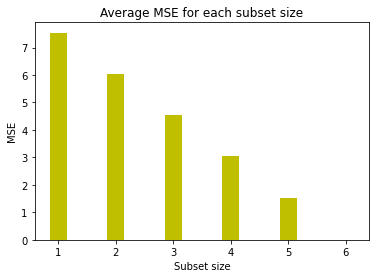

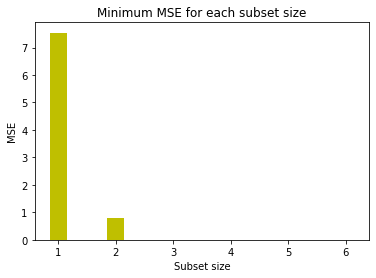

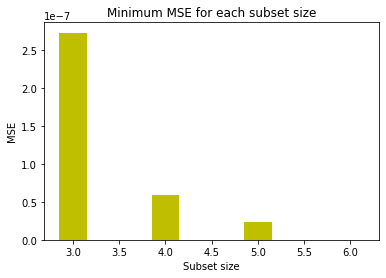

Minimum MSE: 4.3641204995645106e-29
Subset: (0, 1, 2, 3, 4, 5)


In [1]:
# Set-up cell
# Will import all necessary packages, define constants, and define functions

# packages used
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from itertools import combinations
from math import comb


# constants
xi = np.load('Assignment2_Ex1_xi.npy')
ti = np.load('Assignment2_Ex1_ti.npy')

D = 5 # number of coefficients 
K = 5 # number of bins used for cross validation
# Note that K does not have to be equal to D 
# (this is a choice we make here but we could have taken any value for K)

# Errors
MSE = np.zeros((D + 1,1))
MSE_TOTAL = np.zeros((D + 1,1))

##
# split k-1 sections of the data for training and 1 for training
# test_split indicates from what row to what row will be used for testing
# test_split should be a 2-element list where element 1 is the index where the testing set starts (inclusive)
# and element 2 is the index where the testing set ends (non-inclusive)
def split_data(data, test_split):
    start = test_split[0]
    end = test_split[1]
    training = np.append(data[0 : start], data[end :], axis=0)
    testing = data[start: end]
    return training, testing






# Step 1: Finding the optimal d
features = np.arange(0, D + 1)

x_tilde = np.hstack((np.ones((len(xi), 1)), xi))

# list to hold all MSE for each individual subset
mse_d = []

for d in np.arange(1,D+2):
    mse_d.append([])
    # 1) select each of the (D choose d) subset of coefficient and learn a 
    # model and compute the MSE
    
    # select subset of length d
    for subset in combinations(features, d):
        if (0 not in subset):
            continue
        # select all the features relevant to this subset
        curr_x = x_tilde[:, subset]
        
        
        #counter variable 
        mse_k = 0 # MSE accumulator for each cross validation across this subset
        multiple = len(xi) // 5
        for k in range(K):
            test_range = [k * multiple, (k + 1) * multiple]
            training_features, testing_features = split_data(curr_x, test_range)
            training_targets, testing_targets = split_data(ti, test_range)
            
            # train model
            my_regression_model = linear_model.LinearRegression()
            my_regression_model.fit(training_features, training_targets)
            
            # run prediction
            prediction = my_regression_model.predict(testing_features)
        
            # calculate MSE for this spefic cross validation for this specific subset
            mse_k += np.true_divide(1, len(testing_features)) * np.sum((testing_targets - prediction) ** 2)
        # add the average MSE for the subset
        mse_d[-1].append(np.true_divide(mse_k, K))
    
    # 2) once you have computed the MSE for each of the 
    
minMSE = mse_d[0][0]
minIndex = [0, 0]

minMSEArr = np.zeros((D + 1, 1))
    
for i in range(len(MSE)):
    row = mse_d[i]
    minMSEArr[i] = min(row)
    for j in range(len(row)):
        if row[j] < minMSE:
            minMSE = row[j]
            minIndex = [i, j]
    MSE[i] = np.true_divide(sum(row), len(row))

# # # Step 2 plotting the evolution of the average prediction error as a function of the number of coefficient
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('MSE')
ax1.set_xlabel("Subset size")
ax1.set_title('Average MSE for each subset size')
plt.bar(np.arange(1, D + 2), MSE.flatten(), width=-0.3, align="center", color="y")
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('MSE')
ax1.set_xlabel("Subset size")
ax1.set_title('Minimum MSE for each subset size')
plt.bar(np.arange(1, D + 2), minMSEArr.flatten(), width=-0.3, align="center", color="y")
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('MSE')
ax1.set_xlabel("Subset size")
ax1.set_title('Minimum MSE for each subset size')
plt.bar(np.arange(3, D + 2), minMSEArr.flatten()[2:], width=-0.3, align="center", color="y")
plt.show()

# absolute minimum MSE at subset
print("Minimum MSE:", minMSE)
print("Subset:", list(combinations(features, minIndex[0] + 1))[minIndex[1]])

#### Question 2. Predicting graduate admissions (5pts)

In this second question, we want to predict admission to graduate school based on a collection of features [provided by Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions) 
including: 

- GRE and TOEFL Scores
- University Rating 
- Letter of Recommendation Strength 
- Undergraduate GPA 
- ...
    
We want to learn a ridge regression model (use the scikit learn model with the fit and predict functions). 

- Start by splitting the dataset into a training (about 90%) an a test (remaining 10%) parts using a call to the train_test_split function from the model_selection module. Put the test aside for the rest of the exercise. 

- Now that you are perfectly comfortable with the idea of cross validation, we will also try to evaluate the optimal lambda in the Ridge regression model. For this, you can use an extension of scikit learn Ridge regression model: sklearn.linear_model.RidgeCV. This extension lets you specify an array of $\lambda$ values ($\alpha$ in scikit learn) to try. The best value is then returned through a call to the 'alpha_' attribute of the model (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) for more details). Train the model (both lambda and beta) on the training subset of item 1.

- Finally evaluate the prediction of your model on the 10% test set you kept on the side at the beginning. 




Best alpha: 0.8


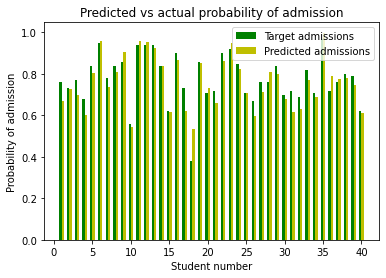

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV


df = pd.read_csv("Admission_Predict.csv")
features = list(df.columns)[1:-1]
target = df.columns[-1]

# put your code here 
# split data
training, testing = sk.model_selection.train_test_split(df, test_size=0.1, train_size=0.9)

training_features = training[features].to_numpy()
training_targets = training[target].to_numpy()
testing_features = testing[features].to_numpy()
testing_targets = testing[target].to_numpy()

# create ridge model
ridgeModel = RidgeCV(np.arange(0.1, 10, 0.1))
ridgeModel.fit(training_features, training_targets)

alpha = ridgeModel.alpha_
print("Best alpha:", alpha)

prediction = ridgeModel.predict(testing_features)

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('Probability of admission')
ax1.set_xlabel("Student number")
ax1.set_title('Predicted vs actual probability of admission')
plt.bar(np.arange(1, len(testing_targets) + 1), testing_targets, width=-0.3, align="edge", color="g")
plt.bar(np.arange(1, len(testing_targets) + 1), prediction, width=0.3, align="edge", color="y")
plt.legend(["Target admissions", "Predicted admissions"])
plt.show()

### Question 3. Iterative Hard and Soft Thresholding (10pts)


An alternative to the simple OLS criterion or to the Ridge regression model, LASSO regression minimizes a combination of a data fidelity term and a penalty on the sum of the absolute values of the regression coefficients, i.e.

\begin{align}
\ell(\boldsymbol \beta ) = \frac{1}{N}\sum_{i=1}^N (t^{(i)} - (\boldsymbol{\beta}^T \boldsymbol x^{(i)}))^2 + \lambda \sum_{j=0}^D |\beta_j|, \quad (\text{LASSO})
\end{align}

One of the main difficulty with the LASSO lies in the non differentiability of the absolute value which appears in the regularization term. Because of the use of the absolute value, the gradient cannot be computed at 0. Instead of relying on gradient updates, we can instead turn to the constrained formulation


\begin{align}
\min & \quad \ell(\boldsymbol \beta ) = \frac{1}{N}\sum_{i=1}^N (t^{(i)} - (\boldsymbol{\beta}^T \boldsymbol x^{(i)}))^2\\
\text{subject to}& \quad \sum_{j=0}^D |\beta_j|\leq t
\end{align}

The drawback with such a formulation is that we now have to solve a constrained problem. A common approach relies on the use of thresholding algorithms and in particular to the class of so-called _iterative shrinkage-thresholding algorithms (ISTA)_. If we write the OLS objective in matrix form as $\ell(\boldsymbol \beta) = \frac{1}{2N}\|\tilde{\mathbf{X}}\mathbf{\beta} - \mathbf{t}\|_2^2$, Iterative shrinkage-thresholding algorithms are based on the following update :


\begin{align}
\mathbf{\beta} \leftarrow \mathcal{T}_{\lambda \eta}\left\{\mathbf{\beta} - 2\eta \tilde{\mathbf{X}}^T\left(\tilde{\mathbf{X}}\mathbf{\beta} - \mathbf{t}\right) \right\}
\end{align}

where $\mathcal{T}$ is the thresholding operator 
\begin{align}
\mathcal{T}_{\alpha}(\mathbf{\beta})_i = \left(|\beta_i| - \alpha\right)_+\text{sign}(\beta_i)
\end{align}

Here $\left(|\beta_i| - \alpha\right)_+ = \max\left\{|\beta_i| - \alpha, 0\right\}$ and $\text{sign}(\beta_i)$ denotes the sign of the coefficient $\beta_i$. From the definition above, you can also see that $\lambda \eta$ acts as a threshold on the $\beta_i$. The larger $\lambda$, the more $\beta_i$ will be set to $0$. 


#### Question 3.1 (6pts) Complete the function ISTA below which should return a vector of weights $\mathbf{\beta}$, starting from some initial guess $\beta_{\text{init}}$ and for a training set stored in the matrix $X$ and vector of targets $t$.

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm


def ISTA(beta_init, lamb, eta, X, t):
    # function should apply the Iterative Shrinkage 
    # Thresholding updates, starting from Beta_init and 
    # for a set of feature vectors stored in matrix X 
    # with associated targets stored in t.
    maxIter = 100
    
    
    beta_ISTA = beta_init
    for i in range(maxIter):
        # gradient descent
        diff = np.matmul(X, beta_ISTA) - t
        beta_ISTA =  beta_ISTA - 2 * np.true_divide(1, X.shape[0]) * eta * np.matmul(X.T, diff)
        
        # reduce
        for j in range(len(beta_ISTA)):
            b = beta_ISTA[j]
            b_new = max(abs(b) - eta * lamb, 0)
            if(b < 0):
                b_new *= -1
            beta_ISTA[j] = b_new
            
    return beta_ISTA 
    


#### Question 3.2 (4pts) Test your algorithm on the dataset provided by the two files 'Assignment2_Ex32_Xi.npy' and 'Assignment2_Ex32_ti.npy' below. as above, two of the weights are irrelevant. Try to tune the parameters $\eta$ and $\lambda$ and study when you can recover those. 

In [4]:
X = np.load('Assignment2_Ex32_Xi.npy')
t = np.load('Assignment2_Ex32_ti.npy')

# put your code here 
x_tilde = np.hstack((np.ones((len(X), 1)), X))

model = LinearRegression()
model.fit(x_tilde, t)

print("BETA init: ", model.coef_)
print()
print("ISTA BETA:", ISTA(model.coef_, 0.01, np.true_divide(1, sum(model.coef_)), x_tilde, t)) 

BETA init:  [0.00000000e+00 1.80403059e+00 6.84747575e-01 1.00000000e-04
 5.06131250e-01 3.00000000e-05]

ISTA BETA: [0.         1.79915018 0.67903635 0.         0.50085149 0.        ]


### Question 4 (5pts). From regression to binary classification: Predicting deaths on the Titanic

We have seen how the OLS objective can be used to learn a regression model. This objective remains in fact absolutely valid in the classification framework. In binary classification, the targets associated to the feature vectors take one of two values (let us say $1$ and $0$ or $+1$ and $-1$). If we want to learn a model that classifies some feature vectors $\mathbf{x}^{(i)}$ as belonging to class $\mathcal{C}_0$ vs $\mathcal{C}_1$ and we are given a training set $C_{0, \text{tr}} = \left\{\mathbf{x}^{(i)}\right\}_{i=1}^{N_0}$ and $C_{1, \text{tr}} = \left\{\mathbf{x}^{(j)}\right\}_{j=1}^{N_1}$, we can try to learn a separating plane $\beta_0 +\beta_1 x_1 + \ldots \beta_D x_D$ such that $\beta_0 +\beta_1 x^{(i)}_1 + \ldots \beta_D x^{(i)}_D =+1 $ for all $x^{(i)}\in C_0$ and $\beta_0 +\beta_1 x^{(j)}_1 + \ldots \beta_D x^{(j)}_D =-1$ for all $x^{(j)}$ in $\mathcal{C}_1$. 

For any new point $\mathbf{x}$ of unknown class, we can then compute $\beta_0 +\beta_1x_1 + \ldots +\beta_D x_D$ and classify our point as belonging to $C_0$ if $\beta_0 +\beta_1x_1 + \ldots +\beta_D x_D>0$.

Combine this idea with the linear regression model from scikit learn to learn a linear binary classifier for the ['Titanic'](https://www.kaggle.com/c/titanic/data?select=test.csv) dataset from Kaggle. Start by loading the training and test data from this dataset and then complete the cell below.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

training_data = pd.read_csv('train.csv')

def feature_target_split(data):
    ti = np.array(training_data.Survived).reshape(-1, 1)
    xi = np.array(training_data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]])
    xi = np.hstack((np.ones((len(xi), 1)), xi))
    
    return xi, ti


# Step 1. 
# =========================================================================
# Use the linearRegression model from scikit learn with binary 
# targets to predict the passengers that will survive and di in the 
# case of the sinking of a ship. Start by turning the class targets to 
# binary or +1/-1 values. Then turn possible non numeric features to numbers. Finally 
# learn the separating plane.

# clean data
for i in range(len(training_data)):
    if (type(training_data["Cabin"][i]) != type(3.4)):
        val = training_data["Cabin"][i][0]
        training_data.loc[i, "Cabin"] = val

training_data.dropna(inplace=True)
training_data.Sex.replace(["female", "male"], [-1, 1], inplace=True)
training_data.Embarked.replace(["C", "Q", "S"], [1, 2, 3], inplace=True)
training_data.Cabin.replace(["A", "B", "C", "D", "E", "F", "G", "T"], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
training_data.Survived.replace(0, -1, inplace=True)

# training vs testing
training, testing = train_test_split(training_data, test_size=0.1, train_size=0.9)

# get features and targets
training_features, training_targets = feature_target_split(training)
testing_features, testing_targets = feature_target_split(training)

model = LinearRegression()
model.fit(training_features, training_targets)

# Step 2. 
# =========================================================================
# Validate your model on the test set and compute the fraction of correctly 
# classified samples using the function accuracy_score from the sklearn.metrics module

from sklearn.metrics import accuracy_score

prediction = model.predict(testing_features)

# transform prediction
for i in range(len(prediction)):
    prediction[i] = 0 if prediction[i] < 0 else 1
    testing_targets[i] = 0 if testing_targets[i] < 0 else 1
score = accuracy_score(testing_targets, prediction)

print("Accuracy:", score)

for i in range(len(prediction)):
    print(i + 1, end=" ")
    if i < 9:
        print("  ", end="")
    elif i < 99:
        print(" ", end="")
    print("Survives      " if prediction[i] == 1 else "Does't survive", end=" | ")
    if (prediction[i] == testing_targets[i]):
        print("Accurate prediction")
    else:
        print("Inaccurate prediction")

Accuracy: 0.7978142076502732
1   Survives       | Accurate prediction
2   Survives       | Accurate prediction
3   Does't survive | Accurate prediction
4   Survives       | Accurate prediction
5   Survives       | Accurate prediction
6   Does't survive | Inaccurate prediction
7   Survives       | Accurate prediction
8   Survives       | Inaccurate prediction
9   Survives       | Accurate prediction
10  Does't survive | Accurate prediction
11  Does't survive | Accurate prediction
12  Survives       | Accurate prediction
13  Does't survive | Accurate prediction
14  Survives       | Accurate prediction
15  Does't survive | Accurate prediction
16  Does't survive | Accurate prediction
17  Survives       | Accurate prediction
18  Does't survive | Accurate prediction
19  Does't survive | Accurate prediction
20  Survives       | Inaccurate prediction
21  Survives       | Accurate prediction
22  Does't survive | Accurate prediction
23  Survives       | Accurate prediction
24  Does't survive | A